# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob
          
# load filenames for human and dog images
human_files = np.array(glob("lfw/lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))


There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


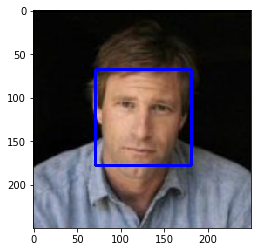

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])

# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
counter = 0

for i in tqdm(range(len(human_files_short))):
    human = human_files_short[i]
    
    if face_detector(human):
        counter+=1
    
print(counter)
print('Total humans counted = %d, Number of faces detected = %d' %(len(human_files_short),counter))
performance = float(counter)/float(len(human_files_short))*100
print('=>Humans detection performance = %.2f%%' %performance)

#Now check performance on dogs
counter = 0

for i in tqdm(range(len(dog_files_short))):
    dog = dog_files_short[i]
    
    if face_detector(dog):
        counter+=1
    
print(counter)
print('Total dogs counted = %d, Number of faces detected = %d' %(len(dog_files_short),counter))
performance = float(counter)/float(len(dog_files_short))*100
print('=>Dog detection performance = %.2f%%' %performance)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 75.62it/s]


96
Total humans counted = 100, Number of faces detected = 96
=>Humans detection performance = 96.00%


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 15.52it/s]


18
Total dogs counted = 100, Number of faces detected = 18
=>Dog detection performance = 18.00%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.




---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models
print(torch.__version__)

1.2.0


In [7]:
# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [8]:
#load ImageNet-Classes as dictionary 
#Downloaded from:
#https://gist.githubusercontent.com/yrevar/6135f1bd8dcf2e0cc683/raw/d133d61a09d7e5a3b36b8c111a8dd5c4b5d560ee/imagenet1000_clsid_to_human.pkl
#and converted pickle-file with dos2unix from
#https://stackoverflow.com/questions/2613800/how-to-convert-dos-windows-newline-crlf-to-unix-newline-lf-in-a-bash-script/19702943#19702943
#and modified to Python 3.x with line 18 to output.write(line + "\n".encode('ascii'))

import pickle

file = open('imagenet1000_clsid_to_human.pkl', 'rb')        

ImageNetClasses = pickle.load( file )
            

In [9]:
ImageNetClasses

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

In [10]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    #taken from https://www.learnopencv.com/pytorch-for-beginners-image-classification-using-pre-trained-models/
    
    #Load
    image = Image.open(img_path)
    #image.show()  #Check
    
    #pre-process
    #define transformer
    transform = transforms.Compose([transforms.Resize(256),
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
    #create transformed image
    image_t = transform(image).cuda()
    #create batch of images
    batch_t = torch.unsqueeze(image_t, 0).cuda()
    
    VGG16.eval()
    out = VGG16(batch_t)
    
    _, index = torch.max(out, 1)
    percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100

    #get the index of the best prediction
    pred_value_t, pred_index_t = torch.topk(percentage, 1)
    
    #pred_index_t is a tensor, we need the value (that is the index!)
    pred_index=pred_index_t.item()
    
    return pred_index # predicted class index

In [11]:
def ShowImage(filename):
    img = cv2.imread(randomfile)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()

It is a bloodhound, sleuthhound!


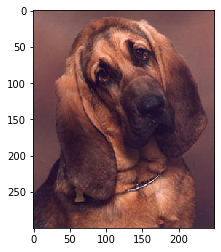

It is a flat-coated retriever!


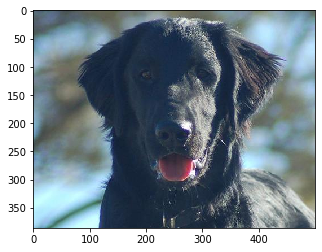

It is a giant schnauzer!


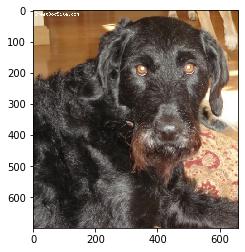

It is a Staffordshire bullterrier, Staffordshire bull terrier!


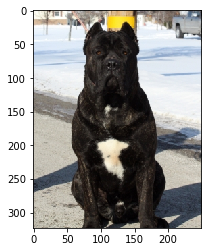

In [12]:
#do some random visual validation test on VGG16_predict
#set the number of tests with NTESTS
import random 

NTEST = 4
i = 0
while i < NTEST:
    randomfile = random.choice(dog_files)
    ClassName = ImageNetClasses.get(VGG16_predict(randomfile))
    print("It is a %s!" %ClassName)
    ShowImage(randomfile)
    i+=1

    
    


### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [13]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    
    #The dogs are all inbetween indices min_index and max_index
    min_index = 151
    max_index = 268
    
    predIndex=VGG16_predict(img_path)
    #print(predIndex)
    if predIndex > min_index and predIndex < max_index:
        return True

    return False

In [14]:
def printdogornot(filename):
    if dog_detector(filename):
        print("it is a dog! :-)")
    else:
        print("that is not a dog!")

dogImages\train\007.American_foxhound\American_foxhound_00518.jpg
it is a dog! :-)


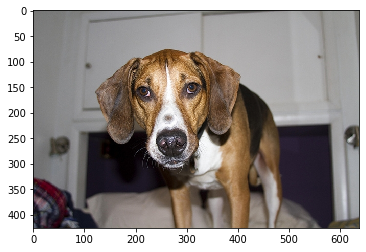

lfw/lfw\Kim_Ryong-sung\Kim_Ryong-sung_0011.jpg
that is not a dog!


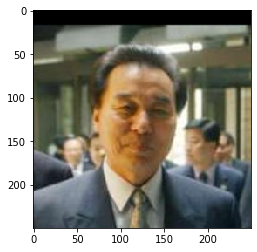

dogImages\train\076.Golden_retriever\Golden_retriever_05203.jpg
it is a dog! :-)


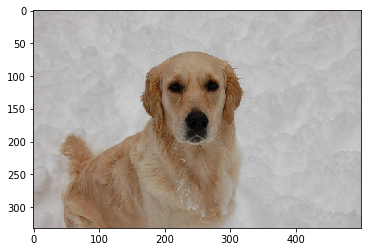

lfw/lfw\Cesar_Gaviria\Cesar_Gaviria_0008.jpg
that is not a dog!


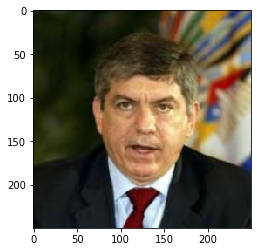

dogImages\train\009.American_water_spaniel\American_water_spaniel_00621.jpg
it is a dog! :-)


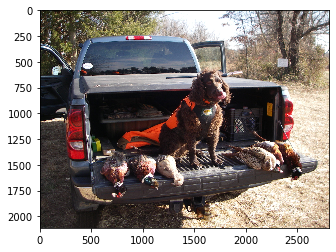

lfw/lfw\Tony_Blair\Tony_Blair_0140.jpg
that is not a dog!


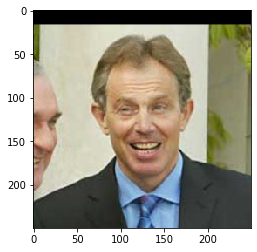

dogImages\train\079.Great_pyrenees\Great_pyrenees_05400.jpg
it is a dog! :-)


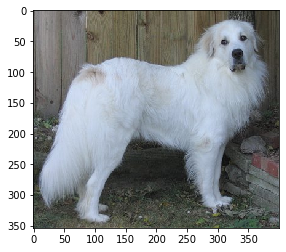

lfw/lfw\John_Kerry\John_Kerry_0004.jpg
that is not a dog!


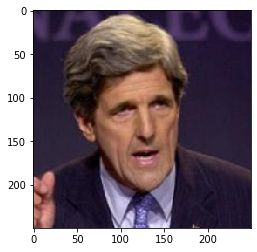

In [15]:
#do some random visual validation test on dog_detector
#set the number of tests you want with NTESTS
import random 

NTEST = 4
i = 0
while i < NTEST:
    randomfile = random.choice(dog_files)
    #do not use VGG16_predict, since it could lead to misleading classification, write ground truth (filename) instead
    print(randomfile)
    printdogornot(randomfile)
    ShowImage(randomfile)
    randomfile = random.choice(human_files)
    #do not use VGG16_predict, since it could lead to misleading classification, write ground truth (filename) instead
    print(randomfile)
    printdogornot(randomfile)
    ShowImage(randomfile)    
    i+=1


### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
See testing result in next cell!
=>Dog detection performance = 94.00%
=>Humans as dogs detected = 0.00%

In [16]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
dogsdetected=0
for i in range(len(dog_files_short)):
    dog = dog_detector(dog_files_short[i])
    
    if dog == True:
        dogsdetected+=1
        

performance = float(dogsdetected)/float(len(dog_files_short))*100
print('=>Dog detection performance = %.2f%%' %performance)

humansdetected=0
for i in range(len(human_files_short)):
    dog = dog_detector(human_files_short[i])
    
    if dog == True:
        humansdetected+=1
        
performance = float(humansdetected)/float(len(human_files_short))*100
print('=>Humans as dogs detected = %.2f%%' %performance)


=>Dog detection performance = 94.00%
=>Humans as dogs detected = 0.00%


In [17]:
#VGG19
dogsdetected=0
for i in tqdm(range(len(dog_files))):
    dog = dog_detector(dog_files[i])
    
    if dog == True:
        dogsdetected+=1
    else:
        pass
        #print("Wrong prediction with "+dog_files[i] + " at Index="+str(i))
        

performance = float(dogsdetected)/float(len(dog_files))*100
print('=>Dog detection performance = %.2f%%' %performance)

100%|██████████████████████████████████████████████████████████████████████████████| 8351/8351 [03:07<00:00, 44.49it/s]


=>Dog detection performance = 97.68%


In [18]:
#Now check only with the test data
# load filenames for human and dog images
#human_files = np.array(glob("lfw/lfw/*/*"))
dog_files_test = np.array(glob("dogImages/test/*/*"))
print("We have %s test dog files"%(len(dog_files_test)))


We have 836 test dog files


In [19]:
#VGG19
dogsdetected=0
for i in tqdm(range(len(dog_files_test))):
    dog = dog_detector(dog_files_test[i])
    
    if dog == True:
        dogsdetected+=1
    else:
        pass
        #print("Wrong prediction with "+dog_files[i] + " at Index="+str(i))
        

performance = float(dogsdetected)/float(len(dog_files_test))*100
print('=>Dog detection performance = %.2f%%' %performance)

100%|████████████████████████████████████████████████████████████████████████████████| 836/836 [00:18<00:00, 46.18it/s]


=>Dog detection performance = 97.37%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [20]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

#Let's check the performance of all available pre-trained models

In [21]:
#vgg16 = models.vgg16()
resnet18= models.resnet18(pretrained=True)
alexnet = models.alexnet(pretrained=True)
squeezenet1_0 = models.squeezenet1_0(pretrained=True)
densenet161 = models.densenet161(pretrained=True)
inception_v3 = models.inception_v3(pretrained=True)
googlenet = models.googlenet(pretrained=True)
shufflenet_v2_x1_0 = models.shufflenet_v2_x1_0(pretrained=True)
mobilenet_v2 = models.mobilenet_v2(pretrained=True)
resnext50_32x4d = models.resnext50_32x4d(pretrained=True)
wide_resnet50_2 = models.wide_resnet50_2(pretrained=True)
mnasnet1_0 = models.mnasnet1_0(pretrained=True)


modelsdict={0: resnet18,
            1: alexnet,
            2: squeezenet1_0,
            3: densenet161,
            4: inception_v3,
            5: googlenet,
            6: shufflenet_v2_x1_0,
            7: mobilenet_v2,
            8: resnext50_32x4d,
            9: wide_resnet50_2,
           10:mnasnet1_0}

modelsdictnames={0: 'resnet18',
            1: 'alexnet',
            2: 'squeezenet1_0',
            3: 'densenet161',
            4: 'inception_v3',
            5: 'googlenet',
            6: 'shufflenet_v2_x1_0',
            7: 'mobilenet_v2',
            8: 'resnext50_32x4d',
            9: 'wide_resnet50_2',
           10: 'mnasnet1_0'}

In [22]:
modelsdictnames.get(4)

'inception_v3'

In [23]:
numberofmodels=len(modelsdict)

In [24]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def models_predict(img_path,model):
    '''
    Use a pre-trained model from modelsdict to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    #taken from https://www.learnopencv.com/pytorch-for-beginners-image-classification-using-pre-trained-models/
    
    #Load
    image = Image.open(img_path)
    #image.show()  #Check
    
    #pre-process
    #define transformer
    transform = transforms.Compose([transforms.Resize(256),
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
    #create transformed image
    image_t = transform(image).cuda()
    #create batch of images
    batch_t = torch.unsqueeze(image_t, 0).cuda()
    
    # move model to GPU if CUDA is available
    if use_cuda:
        model = model.cuda()
    model.eval()
    out = model(batch_t)
    
    _, index = torch.max(out, 1)
    percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100

    #get the index of the best prediction
    pred_value_t, pred_index_t = torch.topk(percentage, 1)
    
    #pred_index_t is a tensor, we need the value (that is the index!)
    pred_index=pred_index_t.item()
    
    return pred_index # predicted class index

In [25]:
def models_dog_detector(img_path, model):
    ## TODO: Complete the function.
    
    #The dogs are all inbetween indices min_index and max_index
    min_index = 151
    max_index = 268
    
    predIndex=models_predict(img_path, model)
    #print(predIndex)
    if predIndex > min_index and predIndex < max_index:
        return True
    #print("False detection at predIndex="+str(predIndex) +" and predicted as "+ str(resnext50_32x4d_predict(img_path)))
    return False

It is a Bedlington terrier!


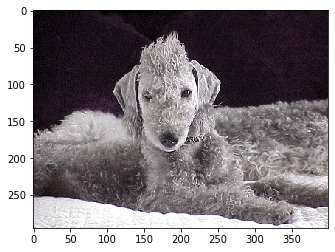

In [26]:
#get a prediction from a random input file with a random model.
#pred1 = models_predict('dogImages\\train\\001.Affenpinscher\\Affenpinscher_00001.jpg', modelsdict.get(2))
randomfile = random.choice(dog_files)
pred = models_predict(randomfile, modelsdict.get(random.randint(0,11)))

ClassName = ImageNetClasses.get(pred)
print("It is a %s!" %ClassName)
ShowImage(randomfile)


In [27]:
performance_dict = {}

In [28]:
#Let's check all available pre-trained models from pytorch!
for j in range(numberofmodels):
    print('Evaluating Model ' + str(modelsdictnames.get(j)) )
    dogsdetected=0
    for i in tqdm(range(len(dog_files_test))):
        dog = models_dog_detector(dog_files_test[i], modelsdict.get(j))

        if dog == True:
            dogsdetected+=1
        else:
            pass
            #print("Wrong prediction with "+dog_files[i] + " at Index="+str(i))

    performance_dict[j] = (float(dogsdetected)/float(len(dog_files_test))*100)
    print('=>Dog detection performance = %.4f%%' %float(performance_dict[j]))

Evaluating Model resnet18


100%|████████████████████████████████████████████████████████████████████████████████| 836/836 [00:18<00:00, 44.08it/s]


=>Dog detection performance = 97.0096%
Evaluating Model alexnet


100%|████████████████████████████████████████████████████████████████████████████████| 836/836 [00:12<00:00, 67.47it/s]


=>Dog detection performance = 97.6077%
Evaluating Model squeezenet1_0


100%|████████████████████████████████████████████████████████████████████████████████| 836/836 [00:17<00:00, 48.10it/s]


=>Dog detection performance = 97.6077%
Evaluating Model densenet161


100%|████████████████████████████████████████████████████████████████████████████████| 836/836 [01:27<00:00,  9.50it/s]


=>Dog detection performance = 97.6077%
Evaluating Model inception_v3


100%|████████████████████████████████████████████████████████████████████████████████| 836/836 [01:05<00:00, 12.86it/s]


=>Dog detection performance = 97.1292%
Evaluating Model googlenet


100%|████████████████████████████████████████████████████████████████████████████████| 836/836 [00:39<00:00, 21.34it/s]


=>Dog detection performance = 97.0096%
Evaluating Model shufflenet_v2_x1_0


100%|████████████████████████████████████████████████████████████████████████████████| 836/836 [00:36<00:00, 23.16it/s]


=>Dog detection performance = 96.8900%
Evaluating Model mobilenet_v2


100%|████████████████████████████████████████████████████████████████████████████████| 836/836 [00:31<00:00, 26.56it/s]


=>Dog detection performance = 97.3684%
Evaluating Model resnext50_32x4d


100%|████████████████████████████████████████████████████████████████████████████████| 836/836 [00:36<00:00, 22.74it/s]


=>Dog detection performance = 97.2488%
Evaluating Model wide_resnet50_2


100%|████████████████████████████████████████████████████████████████████████████████| 836/836 [00:32<00:00, 25.74it/s]


=>Dog detection performance = 96.7703%
Evaluating Model mnasnet1_0


100%|████████████████████████████████████████████████████████████████████████████████| 836/836 [00:30<00:00, 27.53it/s]


=>Dog detection performance = 96.7703%


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [29]:
import os
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
import torch.utils.data as data

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
dog_files_train = np.array(glob("dogImages/train/*/*"))
dog_files_validate = np.array(glob("dogImages/valid/*/*"))
dog_files_test = np.array(glob("dogImages/test/*/*"))

# print number of images in each dataset
print('There are %d total dog train images.' % len(dog_files_train))
print('There are %d total dog validation images.' % len(dog_files_validate))
print('There are %d total dog test images.' % len(dog_files_test))

There are 6680 total dog train images.
There are 835 total dog validation images.
There are 836 total dog test images.


In [30]:
import os
from torchvision import datasets
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
# define train, valid and test data directories
dog_dir = 'dogImages'
train_dir = os.path.join(dog_dir, 'train/')
valid_dir = os.path.join(dog_dir, 'valid/')
test_dir = os.path.join(dog_dir, 'test/')
# load and transform data
RESIZE = 256
FSIZE = 224
# perform data transform WITH DATA AUGMENTATION for training data
train_data_transform = transforms.Compose([transforms.RandomResizedCrop(FSIZE),
                                           transforms.RandomHorizontalFlip(),
                                           transforms.ToTensor(),
                                           transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
# perform data transform for valid/test data (NO DATA AUGMENTATION)
# we only resize, crop and normalize the valid/test dataset
valid_test_data_transform = transforms.Compose([transforms.Resize(RESIZE),
                                                transforms.CenterCrop(FSIZE),
                                                transforms.ToTensor(),
                                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
train_data = datasets.ImageFolder(train_dir, transform=train_data_transform)
valid_data = datasets.ImageFolder(valid_dir, transform=valid_test_data_transform)
test_data = datasets.ImageFolder(test_dir, transform=valid_test_data_transform)
# print out some data stats
print('Total num of breeds: ', len(train_data.classes))
#N_CLASSES defines the number of outputs of the fully-connected neural network
N_CLASSES = len(train_data.classes)

print('Num training images: ', len(train_data))
print('Num validation images: ', len(valid_data))
print('Num test images: ', len(test_data))


# create data loaders 
#How to choose batch size
#https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/
#Batch Gradient Descent. Batch Size = Size of Training Set
#Stochastic Gradient Descent. Batch Size = 1
#Mini-Batch Gradient Descent. 1 < Batch Size < Size of Training Set
#Initially I have chosen mini-batch with Batch Size 32
#other popular batch sizes are 64 and 128
#
#https://machinelearningmastery.com/how-to-control-the-speed-and-stability-of-training-neural-networks-with-gradient-descent-batch-size/
#Smaller batch sizes are noisy, offering a regularizing effect and lower generalization error.
#Smaller batch sizes make it easier to fit one batch worth of training data in memory (i.e. when using a GPU).
#The presented results confirm that using small batch sizes achieves the best training stability and generalization performance, for a given computational cost, across a wide range of experiments. In all cases the best results have been obtained with batch sizes m = 32 or smaller, often as small as m = 2 or m = 4.
#TODO: REDUCE BATCH_SIZE and check effect on training speed.

batch_size = 16



num_workers = 0
train_loader = torch.utils.data.DataLoader(train_data, 
                                           batch_size=batch_size, 
                                           num_workers=num_workers, 
                                           shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, 
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, 
                                          batch_size=batch_size, 
                                          num_workers=num_workers,
                                          shuffle=True)
# store all 3 above loaders into a dictionary
loaders_scratch = {
    'train': train_loader,
    'valid': valid_loader,
    'test': test_loader
}

Total num of breeds:  133
Num training images:  6680
Num validation images:  835
Num test images:  836


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: 
The image size should be maximum 256 x 256 pixels in order to have reasonable computing times. The required input image size depends also on the used architecture. Basically you can feed no matter what resolutions to the network, as long as it is resized and cropped to maximum 256 x 256 pixels by the transformers...
I have chosen 224 x 224 pixels, which is also kind of standard size for CNNs.
I applied little data augmentation, such as RandomHorizontalFlip() and RandomResizedCrop(). Additionally I did also use RandomRotate, but then I removed this one again due to the (much) higher computing times and much lower convergence speed. In the end, it was a trade-off between computing time and accuracy while avoiding overfitting.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [31]:
#You have to calculate everytime your feature sizes whenever you are changing your network.
#This IS tedious and error-prone
#Therefore I think it makes sense to automate this (pytorch, if you are reading :-))
#meanwhile i have my own helper here (instead of using calculator or other tools).

#function to calculate the output size of the Convolutional layers
def CalcOutputImageSize(InputImageSize, Padding, KernelSize, Stride):
    return (InputImageSize+2*Padding-KernelSize)//Stride + 1

#        self.conv1 = nn.Conv2d(3, 32, 3, stride=1, padding=1)
ImageSize = CalcOutputImageSize(FSIZE, 1, 3, 1)
#print(ImageSize)
#        self.conv1b = nn.Conv2d(32, 32, 3, stride=2, padding=1)
ImageSize = CalcOutputImageSize(ImageSize, 1, 3, 2)
#print(ImageSize)    
#Max Pooling
ImageSize = ImageSize // 2 #Kernel Size = 2 and Stride = 2

#        self.conv2 = nn.Conv2d(32, 64, 3, stride=1, padding=1)
ImageSize = CalcOutputImageSize(ImageSize, 1, 3, 1)
#print(ImageSize)
#        self.conv2b = nn.Conv2d(64, 64, 3, stride=2, padding=1)
ImageSize = CalcOutputImageSize(ImageSize, 1, 3, 2)
#print(ImageSize)             
#Max Pooling
ImageSize = ImageSize // 2 #Kernel Size = 2 and Stride = 2

#        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
ImageSize = CalcOutputImageSize(ImageSize, 1, 3, 1)
#print(ImageSize)
#        self.conv3b = nn.Conv2d(128, 128, 3, padding=1)
ImageSize = CalcOutputImageSize(ImageSize, 1, 3, 1)
#Max Pooling
ImageSize = ImageSize // 2 #Kernel Size = 2 and Stride = 2

print(ImageSize)
cnn_out_size = ImageSize*ImageSize*128
print(cnn_out_size)

7
6272


In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.init as init
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

#define the CNN architecture
class Net(nn.Module):
     ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 32, 3, stride=1, padding=1)
        self.conv1b = nn.Conv2d(32, 32, 3, stride=2, padding=1)
        
        self.conv2 = nn.Conv2d(32, 64, 3, stride=1, padding=1)
        self.conv2b = nn.Conv2d(64, 64, 3, stride=2, padding=1)
        
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv3b = nn.Conv2d(128, 128, 3, padding=1)
        
        # pool
        self.pool = nn.MaxPool2d(2, 2)
        
        # fully-connected
        #calculation geometric mean
        linear_mid_size = int(np.sqrt(cnn_out_size*N_CLASSES)) #linear_mid_size= 913
        
        self.fc1 = nn.Linear(cnn_out_size, linear_mid_size) 
        
        self.fc2 = nn.Linear(linear_mid_size, N_CLASSES) 
        
        # drop-out
        self.dropout = nn.Dropout(0.25)
        
    def forward(self, x):
        ## Define forward behavior
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv1b(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv2b(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv3b(x))
        x = self.pool(x)
        
        # flatten
        x = x.view(-1, cnn_out_size)
        
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        
        x = self.dropout(x)
        x = self.fc2(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch=model_scratch.cuda()
    print("Scratch Model moved to GPU!")

Scratch Model moved to GPU!


In [33]:
model_scratch


Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1b): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2b): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3b): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=6272, out_features=913, bias=True)
  (fc2): Linear(in_features=913, out_features=133, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)

In [34]:
#Source: https://gist.github.com/jeasinema/ed9236ce743c8efaf30fa2ff732749f5#file-weight_init-py
# %load weight_init.py 
#!/usr/bin/env python

import torch
import torch.nn as nn
import torch.nn.init as init


def weight_init(m):
    '''
    Usage:
        model = Model()
        model.apply(weight_init)
    '''
    if isinstance(m, nn.Conv1d):
        init.normal_(m.weight.data)
        if m.bias is not None:
            init.normal_(m.bias.data)
    elif isinstance(m, nn.Conv2d):
        init.xavier_normal_(m.weight.data)
        if m.bias is not None:
            init.normal_(m.bias.data)
    elif isinstance(m, nn.Conv3d):
        init.xavier_normal_(m.weight.data)
        if m.bias is not None:
            init.normal_(m.bias.data)
    elif isinstance(m, nn.ConvTranspose1d):
        init.normal_(m.weight.data)
        if m.bias is not None:
            init.normal_(m.bias.data)
    elif isinstance(m, nn.ConvTranspose2d):
        init.xavier_normal_(m.weight.data)
        if m.bias is not None:
            init.normal_(m.bias.data)
    elif isinstance(m, nn.ConvTranspose3d):
        init.xavier_normal_(m.weight.data)
        if m.bias is not None:
            init.normal_(m.bias.data)
    elif isinstance(m, nn.BatchNorm1d):
        init.normal_(m.weight.data, mean=1, std=0.02)
        init.constant_(m.bias.data, 0)
    elif isinstance(m, nn.BatchNorm2d):
        init.normal_(m.weight.data, mean=1, std=0.02)
        init.constant_(m.bias.data, 0)
    elif isinstance(m, nn.BatchNorm3d):
        init.normal_(m.weight.data, mean=1, std=0.02)
        init.constant_(m.bias.data, 0)
    elif isinstance(m, nn.Linear):
        init.xavier_normal_(m.weight.data)
        init.normal_(m.bias.data)
    elif isinstance(m, nn.LSTM):
        for param in m.parameters():
            if len(param.shape) >= 2:
                init.orthogonal_(param.data)
            else:
                init.normal_(param.data)
    elif isinstance(m, nn.LSTMCell):
        for param in m.parameters():
            if len(param.shape) >= 2:
                init.orthogonal_(param.data)
            else:
                init.normal_(param.data)
    elif isinstance(m, nn.GRU):
        for param in m.parameters():
            if len(param.shape) >= 2:
                init.orthogonal_(param.data)
            else:
                init.normal_(param.data)
    elif isinstance(m, nn.GRUCell):
        for param in m.parameters():
            if len(param.shape) >= 2:
                init.orthogonal_(param.data)
            else:
                init.normal_(param.data)


if __name__ == '__main__':
    pass


In [35]:
model_scratch.apply(weight_init)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1b): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2b): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3b): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=6272, out_features=913, bias=True)
  (fc2): Linear(in_features=913, out_features=133, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Architecture:__ 

I have chosen a three-stage (or six) 2D-CNN-Frontend with a "cautious" scaling from input to output in oder to not shock the network. I did not use batch norm, although this technique is reffered in literature to improve convergence and stability of the network and hence helping to reduce training time. 
http://proceedings.mlr.press/v97/jeong19c/jeong19c.pdf

I have design according to the paradigm: larger models typically achieve better accuracy. But there is also the computing trade-off, so I started with smaller CNNs until I had them stabilized und tuned. After that I increased the CNN by adding additional stages and so on.

For a more systemetic approach, have a look at:
https://www.datahubbs.com/deep-learning-101-first-neural-network-with-pytorch/


__Hyperparameter Tuning:__

Initially, I have set the Learning rate to 0.005 since higher learning rates yielded vanishing/exploding weights. 
I have added an explizit weight initialization to prevent exploding weights. The pytorch built-in weights initialization didn't work well. 

The training of the CNN was quite slow, it took more than 60 EPOCHS in order to converge. Therefore some investigations were done how training speed could be improved:

https://towardsdatascience.com/estimating-optimal-learning-rate-for-a-deep-neural-network-ce32f2556ce0

https://arxiv.org/pdf/1803.09820.pdf
Presents an analytical approach how to choose an optimum learning rate.

__Initialization and Momentum:__
http://www.cs.toronto.edu/%7Ehinton/absps/momentum.pdf
"We find that both the initialization and the momentum are crucial since poorly initialized networks cannot be trained with
momentum and well-initialized networks perform markedly worse when the momentum is absent or poorly tuned"

Nesterov Momentum sometimes provide a distinct improvement in performance as demonstrated in the experiments.
The Nesterov Momentum was implemented, and the learning rate was increased to 0.01 and these yielded an increase of test accuracy from 8% to 17% after 40 Epochs, and from 11% to xx% after 80 Epochs.


__Additional Design Considerations:__
See also design considerations: http://cs231n.github.io/convolutional-networks/

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [36]:
import torch.optim as optim

#Try with learning rates {0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001}
LEARNING_RATE = 0.01
MOMENTUM = 0.5
NESTEROV = True

### TODO: select loss function
#How to choose the loss function:
#https://medium.com/udacity-pytorch-challengers/a-brief-overview-of-loss-functions-in-pytorch-c0ddb78068f7
# torch.nn.NLLLoss  = Negative Log-Likelihood Loss is used for classification
#Alternative is:
#torch.nn.CrossEntropyLoss
criterion_scratch = torch.nn.CrossEntropyLoss()

optimizer_scratch = torch.optim.SGD(model_scratch.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM, nesterov=NESTEROV)
#The convergence of the CNN was quite slow, it took more than 100 EPOCHS in order to converge.


### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [37]:
import pickle

def loadvalidlossmin(fname):
    return pickle.load(open(fname, "rb"))

def savevalidlossmin(fname, lossval):
    pickle.dump(lossval, open(fname, "wb"))
    

In [38]:
RESTART = True
if RESTART == True:
    print('Initializing training!')
    #Arrays for plotting training performance
    #Avoid re-initialization if training is resumed with again N_EPOCHS!
    train_loss_history = []
    valid_loss_history = []

    valid_loss_min = np.Inf 
else:
    # optional: load the model if previous model training with N_EPOCHS did not yield a stable result.
    print('Resuming training!')
    model_scratch.load_state_dict(torch.load('model_scratch.pt'))
    
    valid_loss_min = loadvalidlossmin('scratch_lossmin.p')

Initializing training!


In [39]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss

    global valid_loss_min 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0

        ###################
        # train the model #
        ###################
        model.train()
        
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
 
            #Reset gradients to zero in order not to accumulate throughout the batches.
            optimizer.zero_grad()
            
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            
            # calculate the batch loss
            loss = criterion(output, target)
            
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            
            # perform a single optimization step (parameter update)
            optimizer.step()
            
            #calculate the train_loss_history (not cummulated)
            train_loss_history.append(loss.item())
            #calculate the train_loss (cummulated)
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            #Set modulus size to smaller than 300 if you want see something in between
            #if batch_idx % 20000 == 0:
            #    print('Epoch %d, Batch %d training loss: %.6f' %
            #      (epoch, batch_idx + 1, train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
             # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            
            valid_loss_history.append(loss.item())
            
            # update average validation loss 
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            #and make it persistent
            savevalidlossmin('scratch_lossmin.p',valid_loss_min)
    # return trained model
    return model



# train the model
N_EPOCHS = 100


model_scratch = train(N_EPOCHS, loaders_scratch, model_scratch, optimizer_scratch, criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))




Epoch: 1 	Training Loss: 5.071280 	Validation Loss: 4.917933
Validation loss decreased (inf --> 4.917933).  Saving model ...
Epoch: 2 	Training Loss: 4.959343 	Validation Loss: 4.901463
Validation loss decreased (4.917933 --> 4.901463).  Saving model ...
Epoch: 3 	Training Loss: 4.936176 	Validation Loss: 4.906426
Epoch: 4 	Training Loss: 4.932942 	Validation Loss: 4.883480
Validation loss decreased (4.901463 --> 4.883480).  Saving model ...
Epoch: 5 	Training Loss: 4.921551 	Validation Loss: 4.884938
Epoch: 6 	Training Loss: 4.912393 	Validation Loss: 4.888885
Epoch: 7 	Training Loss: 4.903665 	Validation Loss: 4.887142
Epoch: 8 	Training Loss: 4.906388 	Validation Loss: 4.903450
Epoch: 9 	Training Loss: 4.899893 	Validation Loss: 4.864384
Validation loss decreased (4.883480 --> 4.864384).  Saving model ...
Epoch: 10 	Training Loss: 4.877652 	Validation Loss: 4.786251
Validation loss decreased (4.864384 --> 4.786251).  Saving model ...
Epoch: 11 	Training Loss: 4.820129 	Validation Lo

Epoch: 89 	Training Loss: 2.506330 	Validation Loss: 3.065477
Epoch: 90 	Training Loss: 2.526181 	Validation Loss: 3.095610
Epoch: 91 	Training Loss: 2.518764 	Validation Loss: 3.022952
Epoch: 92 	Training Loss: 2.500928 	Validation Loss: 2.882178
Validation loss decreased (2.956373 --> 2.882178).  Saving model ...
Epoch: 93 	Training Loss: 2.449238 	Validation Loss: 2.991487
Epoch: 94 	Training Loss: 2.471083 	Validation Loss: 2.923648
Epoch: 95 	Training Loss: 2.403361 	Validation Loss: 2.891343
Epoch: 96 	Training Loss: 2.406559 	Validation Loss: 2.908147
Epoch: 97 	Training Loss: 2.395138 	Validation Loss: 2.841853
Validation loss decreased (2.882178 --> 2.841853).  Saving model ...
Epoch: 98 	Training Loss: 2.349619 	Validation Loss: 2.928904
Epoch: 99 	Training Loss: 2.361528 	Validation Loss: 2.968078
Epoch: 100 	Training Loss: 2.351535 	Validation Loss: 3.161860


<All keys matched successfully>

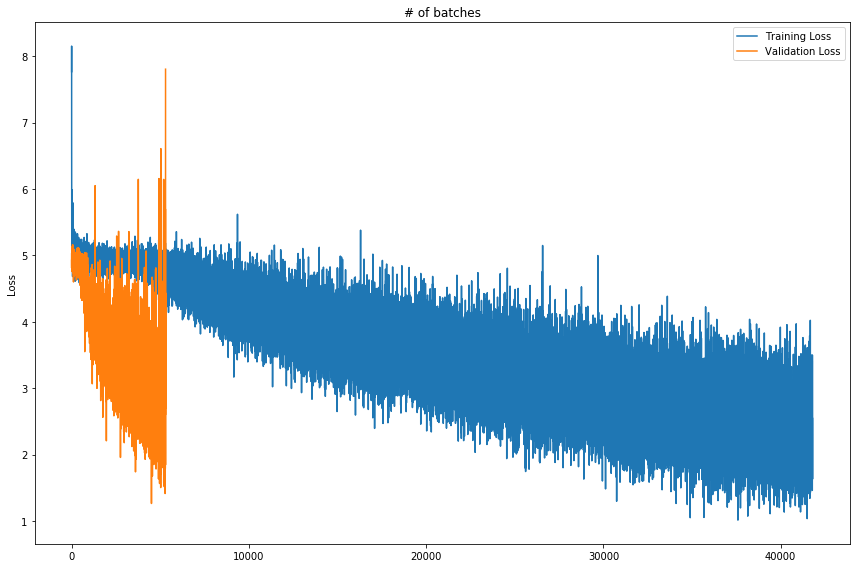

In [40]:
#Plot the training performance
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.plot(train_loss_history, label='Training Loss')
ax.legend()
ax.set_ylabel('Loss')

ax.plot(valid_loss_history, label='Validation Loss')
ax.legend()

ax.set_title('# of batches')

plt.tight_layout()
plt.show()


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [41]:
test_loss_history = []

def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        
        test_loss_history.append(loss.item())
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.761389


Test Accuracy: 32% (275/836)


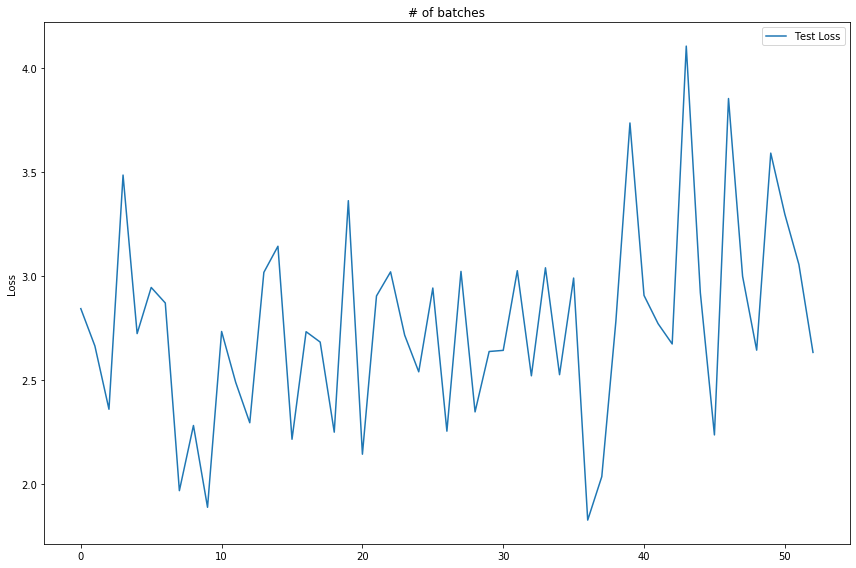

In [42]:
          
#Plot the training performance
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.plot(test_loss_history, label='Test Loss')
ax.legend()
ax.set_ylabel('Loss')

ax.set_title('# of batches')

plt.tight_layout()
plt.show()

---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [43]:
## TODO: Specify data loaders

import os
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
import torch.utils.data as data

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
# define train, valid and test data directories
dog_dir = 'dogImages'
train_dir = os.path.join(dog_dir, 'train/')
valid_dir = os.path.join(dog_dir, 'valid/')
test_dir = os.path.join(dog_dir, 'test/')
# load and transform data
RESIZE = 256
FSIZE = 224
# perform data transform WITH DATA AUGMENTATION for training data
train_data_transform = transforms.Compose([transforms.RandomResizedCrop(FSIZE),
                                           transforms.RandomHorizontalFlip(),
                                           transforms.ToTensor(),
                                           transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
# perform data transform for valid/test data (NO DATA AUGMENTATION)
# we only resize, crop and normalize the valid/test dataset
valid_test_data_transform = transforms.Compose([transforms.Resize(RESIZE),
                                                transforms.CenterCrop(FSIZE),
                                                transforms.ToTensor(),
                                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
train_data = datasets.ImageFolder(train_dir, transform=train_data_transform)
valid_data = datasets.ImageFolder(valid_dir, transform=valid_test_data_transform)
test_data = datasets.ImageFolder(test_dir, transform=valid_test_data_transform)
# print out some data stats
print('Total num of breeds: ', len(train_data.classes))
#N_CLASSES defines the number of outputs of the fully-connected neural network
N_CLASSES = len(train_data.classes)

print('Num training images: ', len(train_data))
print('Num validation images: ', len(valid_data))
print('Num test images: ', len(test_data))


batch_size = 16
num_workers = 0


train_loader = torch.utils.data.DataLoader(train_data, 
                                           batch_size=batch_size, 
                                           num_workers=num_workers, 
                                           shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, 
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, 
                                          batch_size=batch_size, 
                                          num_workers=num_workers,
                                          shuffle=True)
# store all 3 above loaders into a dictionary
loaders_transfer = {
    'train': train_loader,
    'valid': valid_loader,
    'test': test_loader
}

Total num of breeds:  133
Num training images:  6680
Num validation images:  835
Num test images:  836


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [44]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 

model_transfer = models.densenet161(pretrained=True)
if use_cuda:
    model_transfer = model_transfer.cuda()

In [45]:
model_transfer

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [46]:
# Freeze model weights
for param in model_transfer.parameters():
    param.requires_grad = False

In [47]:
features = model_transfer._modules['features']
features

Sequential(
  (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu0): ReLU(inplace=True)
  (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (denseblock1): _DenseBlock(
    (denselayer1): _DenseLayer(
      (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU(inplace=True)
      (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu2): ReLU(inplace=True)
      (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    )
    (denselayer2): _DenseLayer(
      (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU(inplace=True)
      (conv1): Conv2d(144, 192, 

In [48]:
CNN_output = features._modules['norm5']
CNN_output

BatchNorm2d(2208, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [49]:
num_ftrs = model_transfer.classifier.in_features
num_ftrs

2208

In [50]:
#Adding custom classifier
#How to add , see my comment in
#https://discuss.pytorch.org/t/pytorch-transfer-learning-with-densenet/15579/8

import torch.nn as nn
# Add on classifier
n_inputs = num_ftrs  #number inputs given by Densenet-161 Architecture
n_classes = 133

model_transfer.classifier = nn.Linear(n_inputs, n_classes)        


In [51]:
model_transfer

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [52]:
# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    model_transfer = model_transfer.cuda()
    print("Model transferred to CUDA!")


Model transferred to CUDA!


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
Within the available pytorch pre-trained libraries, Densenet-161 has the lowest Top-5-error. Hence I expect the best test accuracy.
Source: https://towardsdatascience.com/transfer-learning-with-convolutional-neural-networks-in-pytorch-dd09190245ce
Additionally, all given pre-trained modells were tested on detecting dogs, see above... Densenet yielded the best performance.
For that reason, Densenet-161 was chosen

Tackling the task:
- [x] Load in the pre-trained Densenet-161 model trained on a large dataset
- [x] Freeze parameters (weights) in CNN model’s lower convolutional layers
- [x] Check the output-size (number of features) of the CNN
- [x] Add custom classifier with one fully connected layer with number of features of the CNN output and the number of classes (dog breeds)
- [x] Train classifier layers on training data available for task
- [x] Fine-tune hyperparameters and add more layers as needed
- [x] Re-iterate until eventually convergence is reached!

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [53]:
import torch.optim as optim

#Try with learning rates {0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001}
LEARNING_RATE = 0.01
MOMENTUM = 0.5
NESTEROV = True

criterion_transfer = torch.nn.CrossEntropyLoss()
optimizer_transfer = torch.optim.SGD(model_transfer.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM, nesterov=NESTEROV)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [54]:
RESTART = True
if RESTART == True:
    print('Initializing training!')
    #Arrays for plotting training performance
    #Avoid re-initialization if training is resumed with again N_EPOCHS!
    train_loss_history = []
    valid_loss_history = []
    valid_loss_min = np.Inf 
else:
    print('Resuming training!')
    model_transfer.load_state_dict(torch.load('model_transfer.pt'))
    valid_loss_min = loadvalidlossmin('transfer_lossmin.p')

Initializing training!


In [55]:
valid_loss_min

inf

In [56]:
#https://towardsdatascience.com/transfer-learning-with-convolutional-neural-networks-in-pytorch-dd09190245ce
# Find total parameters and trainable parameters
# With this verify that the Convolutional Network is not going to be retrained!
total_params = sum(p.numel() for p in model_transfer.parameters())
print(f'{total_params:,} total parameters.')
total_trainable_params = sum(
    p.numel() for p in model_transfer.parameters() if p.requires_grad)
print(f'{total_trainable_params:,} training parameters.')

26,765,797 total parameters.
293,797 training parameters.


In [57]:
# train the model
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    
    global valid_loss_min
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0

        ###################
        # train the model #
        ###################
        model.train()
        
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
 
            #Reset gradients to zero in order not to accumulate throughout the batches.
            optimizer.zero_grad()
            
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            
            # calculate the batch loss
            loss = criterion(output, target)
            
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            
            # perform a single optimization step (parameter update)
            optimizer.step()
            
            #calculate the train_loss_history (not cummulated)
            train_loss_history.append(loss.item())
            #calculate the train_loss (cummulated)
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            #Set modulus size to smaller than 300 if you want see some progress in between
            #if batch_idx % 20000 == 0:
            #    print('Epoch %d, Batch %d training loss: %.6f' %
            #      (epoch, batch_idx + 1, train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
             # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            
            valid_loss_history.append(loss.item())
            
            # update average validation loss 
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss        
            savevalidlossmin('transfer_lossmin.p',valid_loss_min)
    # return trained model
    return model



# train the model
N_EPOCHS = 20


model_transfer = train(N_EPOCHS, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

#Results after 20 Epochs, converging extremely fast!
#Question: Why is the validation loss around 40-60% lower than the training loss? 
#Underfitting – Validation and training error high
#Overfitting – Validation error is high, training error low
#Good fit – Validation error low, slightly higher than the training error
#Unknown fit - Validation error low, training error 'high'
#Source: https://stats.stackexchange.com/questions/187335/validation-error-less-than-training-error

Epoch: 1 	Training Loss: 3.118311 	Validation Loss: 1.353402
Validation loss decreased (inf --> 1.353402).  Saving model ...
Epoch: 2 	Training Loss: 1.528113 	Validation Loss: 0.771307
Validation loss decreased (1.353402 --> 0.771307).  Saving model ...
Epoch: 3 	Training Loss: 1.146867 	Validation Loss: 0.585820
Validation loss decreased (0.771307 --> 0.585820).  Saving model ...
Epoch: 4 	Training Loss: 0.977223 	Validation Loss: 0.509746
Validation loss decreased (0.585820 --> 0.509746).  Saving model ...
Epoch: 5 	Training Loss: 0.872875 	Validation Loss: 0.469364
Validation loss decreased (0.509746 --> 0.469364).  Saving model ...
Epoch: 6 	Training Loss: 0.788645 	Validation Loss: 0.405973
Validation loss decreased (0.469364 --> 0.405973).  Saving model ...
Epoch: 7 	Training Loss: 0.760002 	Validation Loss: 0.386144
Validation loss decreased (0.405973 --> 0.386144).  Saving model ...
Epoch: 8 	Training Loss: 0.723512 	Validation Loss: 0.365321
Validation loss decreased (0.38614

<All keys matched successfully>

In [58]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [59]:
# Copy paste from model_scratch
test_loss_history = []

def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        
        test_loss_history.append(loss.item())
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))
    
    
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.325130


Test Accuracy: 90% (754/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [60]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
#class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]


from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def predict_breed_transfer(img_path):
    '''
    Use pre-trained Densenet-161 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to model_transfer model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    #Load
    image = Image.open(img_path)
    
    #pre-process
    #define transformer
    transform = transforms.Compose([transforms.Resize(256),
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
    #create transformed image
    image_t = transform(image).cuda()
    #create batch of images
    batch_t = torch.unsqueeze(image_t, 0).cuda()
    
    model_transfer.eval()
    out = model_transfer(batch_t)
    
    _, index = torch.max(out, 1)
    percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100

    #get the index of the best prediction
    pred_value_t, pred_index_t = torch.topk(percentage, 1)
    
    #pred_index_t is a tensor, we need the value (that is the index!)
    pred_index=pred_index_t.item()
    
    pred_value_t, pred_index_t = torch.topk(percentage, 5)
    
    return pred_index, pred_value_t, pred_index_t  # predicted class index plus topk-5



In [61]:
#https://github.com/elenab/project-dog-breed-classifier/blob/master/dog_app.ipynb
def image_to_tensor(img_path):
    '''
    As per Pytorch documentations: All pre-trained models expect input images normalized in the same way, 
    i.e. mini-batches of 3-channel RGB images
    of shape (3 x H x W), where H and W are expected to be at least 224. 
    The images have to be loaded in to a range of [0, 1] and 
    then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225]. 
    You can use the following transform to normalize:
    '''
    img = Image.open(img_path).convert('RGB')
    transformations = transforms.Compose([transforms.Resize(size=224),
                                          transforms.CenterCrop((224,224)),
                                         transforms.ToTensor(),
                                         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                              std=[0.229, 0.224, 0.225])])
    image_tensor = transformations(img)[:3,:,:].unsqueeze(0)
    return image_tensor


# helper function for un-normalizing an image  - from STYLE TRANSFER exercise
# and converting it from a Tensor image to a NumPy image for display
def im_convert(tensor):
    """ Display a tensor as an image. """
    
    image = tensor.to("cpu").clone().detach()
    image = image.numpy().squeeze()
    image = image.transpose(1,2,0)
    image = image * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
    image = image.clip(0, 1)

    return image

In [62]:
#I cannot use this one:
#class_names = [item[4:].replace("_", " ") for item in  image_datasets['train'].classes]

class_names = [item[4:].replace("_", " ") for item in  test_data.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    image_tensor = image_to_tensor(img_path)

    # move model inputs to cuda, if GPU available
    if use_cuda:
        image_tensor = image_tensor.cuda()

    # get sample outputs
    output = model_transfer(image_tensor)
    # convert output probabilities to predicted class
    _, preds_tensor = torch.max(output, 1)

    pred = np.squeeze(preds_tensor.numpy()) if not use_cuda else np.squeeze(preds_tensor.cpu().numpy())

    return class_names[pred]

In [63]:
def display_image(img_path, title="Title"):
    image = Image.open(img_path)
    plt.title(title)
    plt.imshow(image)
    plt.show()

Groundtruth: dogImages\test\003.Airedale_terrier\Airedale_terrier_00179.jpg


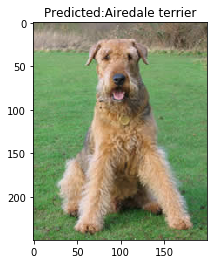

Groundtruth: dogImages\test\004.Akita\Akita_00262.jpg


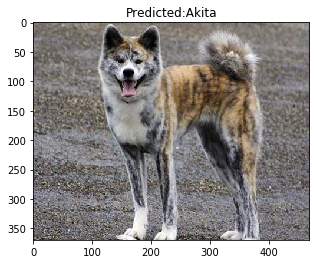

Groundtruth: dogImages\test\007.American_foxhound\American_foxhound_00531.jpg


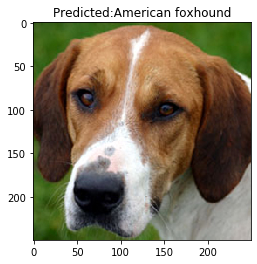

Groundtruth: dogImages\test\003.Airedale_terrier\Airedale_terrier_00214.jpg


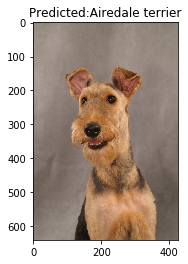

Groundtruth: dogImages\test\005.Alaskan_malamute\Alaskan_malamute_00383.jpg


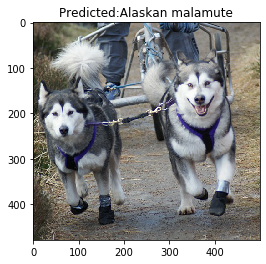

Groundtruth: dogImages\test\005.Alaskan_malamute\Alaskan_malamute_00360.jpg


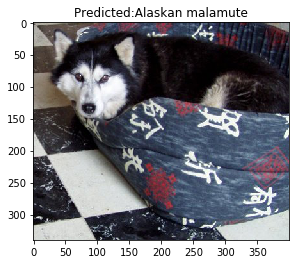

Groundtruth: dogImages\test\003.Airedale_terrier\Airedale_terrier_00210.jpg


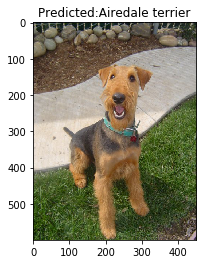

Groundtruth: dogImages\test\002.Afghan_hound\Afghan_hound_00151.jpg


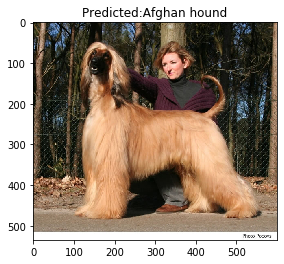

Groundtruth: dogImages\test\008.American_staffordshire_terrier\American_staffordshire_terrier_00580.jpg


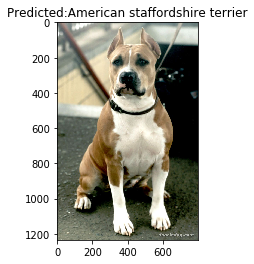

Groundtruth: dogImages\test\008.American_staffordshire_terrier\American_staffordshire_terrier_00540.jpg


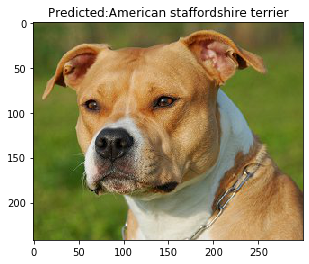

In [64]:
import random
# Try out the function
for image in random.sample(list(dog_files_short), 10): 
    predicted_breed = predict_breed_transfer(image)

    print('Groundtruth: '+str(image))
    display_image(image, title=f"Predicted:{predicted_breed}")
    

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [65]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    if face_detector(img_path):
        print('Hey, you are a human!')
        display_image(img_path, title='image with a human')
    elif predict_breed_transfer(img_path):
        print('Hey puppy!')
        predicted_breed = predict_breed_transfer(img_path)
        display_image(img_path, title=f"Predicted:{predicted_breed}")        
    else:
        print('I have no clue what you are!')
        display_image(img_path, title="what are you?")


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 
1. The test accuracy of the Densenet plus the trained fully connected layer is already 90%, which can easily compare to literature  or state-of-the art image classifier:
https://paperswithcode.com/sota/image-classification-on-imagenet
The Network was trained for only 20 Epochs, the network had the latest update of the min_validation after 19 Epochs. I therefore conclude that the network is not fully trained.

2. Additional improvement be achieved by additional training of the given model, playing with the hyperparemeters. Also applying some systematic approach for hyperparameter tuning
https://arxiv.org/pdf/1803.09820.pdf
One idea would be to apply decaying learning-rates and momentum.

3. Add a more sophisticated classifier network, i.e. two-stage or even three-stage, make use of ReLUs.

4. Evaluate (by implementing model_transfer with) all pre-trained models and take the best-performing.

5. Apply ensemble-learning by combining the predictions from the "weak learners" i.e. XGBoost
https://machinelearningmastery.com/ensemble-methods-for-deep-learning-neural-networks/

6. The face-detector with CV2-haar-detectors is quite weak. It can be easily fooled with beards and (sun-)glasses
A CNN-based detector could be used alternatively!

7. The training of the CNN and the outcome (i.e. the test accuracy) is stochastic (random weight initialisation, stochastic gradient descent,...). Hence this means a successful training on the first run is not guaranteed! It makes sense to save the archive the best model and restart the training to do several training iterations. Finally choose the best one. Genetic algorithms could be applied as well to tackle this challenge.

8. Increase drastically the number of the input training images in order to improve generalization.

9. Add more data augmentation, apply dataset resampling

Hey, you are a human!


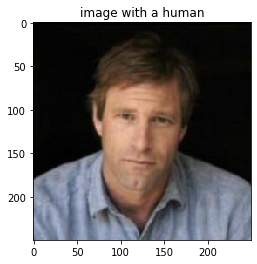

Hey, you are a human!


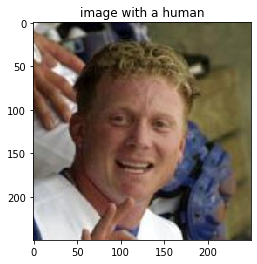

Hey puppy!


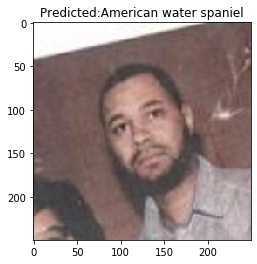

Hey puppy!


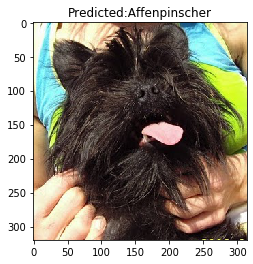

Hey puppy!


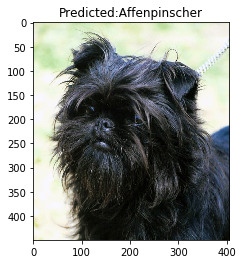

Hey puppy!


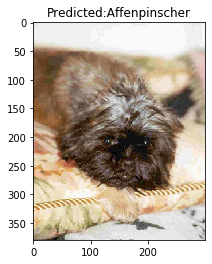

In [66]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

Hey puppy!


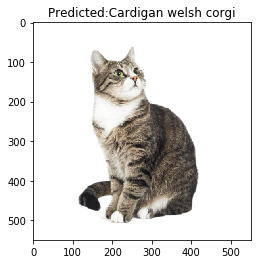

In [67]:
run_app('./images/cat1.jpg')

Hey puppy!


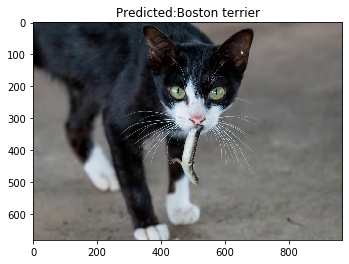

In [68]:
run_app('./images/cat2.jpg')

Well, this dog classifier is not able to distinct beween cat and dog! It is only a dog classifier, it never learned other than dogs. 